In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

In [2]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [3]:
# 데이터 적재
oecd_bli = pd.read_csv('../datasets/lifesat/oecd_bli_2015.csv', thousands = ',')
gdp_per_capita = pd.read_csv('../datasets/lifesat/gdp_per_capita.csv', thousands = ',',
                            delimiter = '\t', encoding = 'latin1', na_values = 'n/a')

In [4]:
# 데이터 준비
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats['GDP per capita']]
Y = np.c_[country_stats['Life satisfaction']]

In [5]:
# 주피터에 그래프를 깔끔하게 그리기 위해서
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

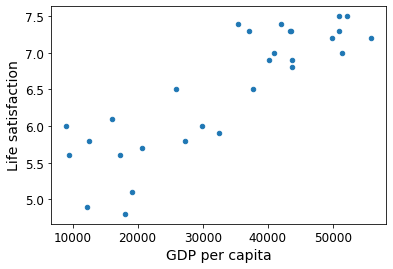

In [6]:
# 데이터 시각화
country_stats.plot(kind = 'scatter', x = 'GDP per capita', y = 'Life satisfaction')
plt.show()

In [7]:
# 선형 모델 선택
model = sklearn.linear_model.LinearRegression()

In [8]:
# 모델 훈련
model.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
# 키프로스에 대한 예측 만들기
X_new = [[22587]] # 키프로스 1인당 GDP
print(model.predict(X_new)) # 결과

[[5.96242338]]


# 1.7 연습문제

## 1. 머신러닝을 어떻게 정의할 수 있나요?

데이터로부터 기계를 학습시켜서 새로운 데이터에 대해 예측을 수행하는 작업(50%)

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

-> 데이터로부터 학습할 수 있는 시스템을 만드는 것이다. 학습이란 어떤 작업에서 주어진 성능 지표가 더 나아지는 것을 의미한다.

## 2. 머신러닝이 도움을 줄 수 있는 문제 유형 네 가지를 말해보세요. 

지도 학습, 비지도 학습, 준지도 학습, 강화 학습(X)

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

-> 명확한 해결책이 없는 복잡한 문제, 수작업으로 만든 긴 규칙 리스트를 대체하는 경우, 변화하는 환경에 적응하는 시스템을 만드는 경우, 사람에게 통찰을 제공해야 하는 경우(예를 들어, 데이터 마이닝)

## 3. 레이블된 훈련 세트란 무엇인가요?

데이터에 대한 정답이 존재하는 훈련 세트를 의미한다.(90%)

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

-> 각 샘플에 대해 원하는 정답(= 레이블)을 담고 있는 훈련 세트

## 4. 가장 널리 사용되는 지도 학습 작업 두 가지는 무엇인가요?

분류와 회귀(100%)

-> 분류와 회귀

## 5. 보편적인 비지도 학습 작업 네 가지는 무엇인가요?

군집화, ...(X)

++++++++++++++++++++++++++++++++++++++++++++++++++

-> 군집, 시각화, 차원 축소, 연관 규칙 학습

## 6. 사전 정보가 없는 여러 지형에서 로봇을 걸어가게 하려면 어떤 종류의 머신러닝 알고리즘을 사용할 수 있나요?

강화 학습을 통해 기대값이 가장 큰 쪽으로 로봇을 걷게끔 학습하는 것이 좋다(80%)

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

-> 지도 학습이나 비지도 학습으로 표현하는 것도 가능하지만 일반적이지 않고 알려지지 않은 지형을 탐험하는 로봇을 학습시키는 가장 좋은 방법은 강화학습이다.

## 7. 고객을 여러 그룹으로 분할하려면 어떤 알고리즘을 사용해야 하나요?

군집화 알고리즘을 통해 같은 부류끼리 그룹으로 묶어야 한다.(50%)

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

-> 그룹을 어떻게 정의할지 모른다면 비슷한 고객끼리 군집으로 나누기 위해 군집 알고리즘(비지도 학습)을 사용한다. 그러나 어떤 그룹이 있어야 할지 안다면 분류 알고리즘(지도 학습)에 각 그룹에 대한 샘플을 주입한다.

## 8. 스팸 감지의 문제는 지도 학습과 비지도 학습 중 어떤 알고리즘을 사용해야 하나요?

지도 학습 알고리즘을 통해 스팸 문자인지 아닌지에 대한 레이블 값을 통해 스팸 감지를 수행해야 한다.(100%)

전형적인 지도학습 문제, 많은 이메일과 이에 상응하는 레이블이 제공된다.

## 9. 온라인 학습 시스템이 무엇인가요?

데이터 하나에 대해 학습하는 시스템(30%)

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

배치 학습 시스템과 달리 점진적으로 학습할 수 있다. 변화하는 데이터와 자율 시스템에 빠르게 적응하고, 매우 많은 양의 데이터를 훈련시킬 수 있다.

## 10. 외부 메모리 학습이 무엇인가요?

X

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

컴퓨터 주메모리에 들어갈 수 없는 대용량 데이터를 다루는 학습이다. 데이터를 미니배치로 나누고 온라인 학습 기법을 사용해 학습한다.

## 11. 예측을 하기 위해 유사도 측정에 의존하는 학습 알고리즘은 무엇인가요?

비지도학습 알고리즘(X)

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

인스턴스 기반 학습 시스템은 훈련 데이터를 기억하여 새로운 샘플이 주어지면 유사도 측정을 사용해 학습된 샘플 중 가장 비슷한 것을 찾아 예측으로 사용한다.

## 12. 모델 파라미터와 학습 알고리즘의 하이퍼파라미터 사이에는 어떤 차이가 있나요?

하이퍼파라미터는 사용자가 직접 값을 조정하여 사용할 수 있지만 모델 파라미터는 사용자가 직접 값을 조정할 수 없다.(10%)

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

모델은 하나 이상의 파라미터(예를 들어 선형 모델의 기울기)를 사용해 새로운 샘플이 주어지면 무엇을 예측할지 결정한다. 학습 알고리즘은 모델이 새로운 샘플에 잘 일반화되도록 이런 파라미터들의 최적값을 찾는다. 하이퍼파라미터는 모델이 아니라 학습 알고리즘 자체의 파라미터이다(예를 들어 적용할 규제의 정도).

## 13. 모델 기반 알고리즘이 찾는 것은 무엇인가요? 성공을 위해 이 알고리즘이 사용하는 가장 일반적인 전략은 무엇인가요? 예측은 어떻게 만드나요?

모델을 기반으로 학습 데이터를 통해 학습 시켜 최적의 매개변수를 찾는다. 학습한 데이터에 대해 레이블된 값과 모델을 통해 나온 값의 오차만큼은 역전파를 통하여 다시 학습한다. 그 후 테스트 데이터를 통해 예측을 만든다.(30%)

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

새로운 샘플에 잘 일반화되기 위한 모델 파라미터의 최적값을 찾는다. 훈련 데이터에서 시스템의 예측이 얼마나 나쁜지 측정하고 모델의 규제가 있다면 모델의 복잡도에 대한 패널티를 더한 비용 함수를 최소화하여 세스템을 훈련시킨다. 학습 알고리즘이 찾은 파라미터를 사용하는 모델의 예측 함수에 새로운 샘플의 특성을 주입한다.

## 14. 머신러닝의 주요 도전 과제는 무엇인가요?

새로운 데이터에 대해 일반화가 잘 된 모델을 예측하는 것(X)

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

부족한 데이터, 낮은 데이터 품질, 대표성 없는 데이터, 무의미한 특성, 훈련 데이터에 과소적합된 간단한 모델, 훈련 데이터에 과대적합된 복잡한 모델 등이다.

## 15. 모델이 훈련 데이터에서의 성능은 좋지만, 새로운 샘플에서의 일반화 성능이 나쁘다면 어떤 문제가 있는 건가요? 가능한 해결책 세 가지는 무엇인가요?

훈련 데이터에 과대적합이 되어 일반화 성능이 나빠졌다. 규제를 키우거나, 학습 데이터를 더 많이 추가하거나, ... (60%)

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

모델이 훈련 데이터에 대해 과대적합 되었을 가능성이 높다. 더 많은 데이터를 모으거나, 모델을 단순화하거나(간단한 알고리즘 선택 or 특성이나 파라미터 수 줄이기 or 모델에 규제 추가), 훈련 데이터에 있는 잡음 감소시키기

## 16. 테스트 세트가 무엇인고 왜 사용해야 하나요?

모델의 일반화 성능을 측정하기 위해 전체 데이터에서 일부를 떼어서 사용한다.(80%)

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

실전에 배치되기 전에 모델이 새로운 샘플에 대해 만든 알반화 오차를 추정하기 위해 사용하는 데이터 집합이 테스트 세트이다.

## 17. 검증 세트의 목적은 무엇인가요?

모델이 훈련 데이터에 대해 과대적합되는 것을 방지하기 위해 사용된다.(20%)

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

모델을 비교하는 데 사용되고, 가장 좋은 모델을 고르고 하이퍼파라미터를 튜닝한다.

## 18. 테스트 세트를 사용해 하이퍼파라미터를 튜닝하면 어떤 문제가 생기나요?

모델이 과소적합이 될 수도 있고, 과대적합될 수도 있다(50%)

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

테스트 세트에 과대적합이 될 위험이 있고, 일반화 오차는 매우 낙관적으로 측정된다(기대한 것보다 성능이 나쁠 것).

## 19. 교차 검증이 무엇이고, 왜 하나의 검증 세트보다 선호하나요?

X

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

검증 세트를 별도로 분리하지 않고 모델을 비교할 수 있는 기술이 교차 검증이고, 훈련 데이터를 최대한 활용하도록 돕기 때문에 선호한다.